In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 

In [3]:
data = pd.read_csv("quikr_car - quikr_car.csv")

In [4]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
data.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [6]:
data= data[data["year"].str.isnumeric()]

In [7]:
data['year']=data['year'].astype(int)

In [8]:
data['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [9]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [10]:
data = data[data['Price']!= 'Ask For Price']

In [11]:
data['Price'] = data['Price'].str.replace(',','').astype(int)

C:\Users\asus\AppData\Local\Temp\ipykernel_16624\243074014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace(',','').astype(int)


In [12]:
data['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

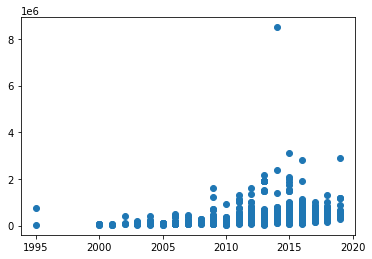

In [13]:
import matplotlib.pyplot as plt
x= data['year']
y= data['Price']
plt.scatter(x,y)

In [14]:
data.loc[data['Price']> 3500000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,"45,000 kms",Diesel


In [15]:
data = data.drop(562,axis=0)

In [16]:
data['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 818, dtype: object

In [17]:
# data = data['kms_driven'].str.isnumeric()

In [18]:
data['kms_driven']= data['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [19]:
data['kms_driven'].info

<bound method Series.info of 0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 818, dtype: object>

In [20]:
data = data[data['kms_driven'].str.isnumeric()]

In [21]:
data['kms_driven']=data['kms_driven'].astype(int)

In [22]:
data['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: int32

In [23]:
data[data['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [24]:
data = data[~data['fuel_type'].isna()]

In [25]:
data['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 815, dtype: object

In [26]:
data.info()
# data is cleaned


<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.0+ KB


In [27]:
data1 = data.to_csv('duplicate_car.csv')

In [28]:
data1 = pd.read_csv('duplicate_car.csv')
data1.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel


In [29]:
x = data1.drop(columns='Price')
y= data1['Price']

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [34]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [35]:
ohe.categories_

[array(['Audi A3 Cabriolet 40 TFSI',
        'Audi A4 1.8 TFSI Multitronic Premium Plus',
        'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
        'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
        'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
        'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
        'BMW 5 Series 520d Sedan', 'BMW 5 Series 530i',
        'BMW 7 Series 740Li Sedan', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d xLine', 'Chevrolet Beat',
        'Chevrolet Beat Diesel', 'Chevrolet Beat LS Diesel',
        'Chevrolet Beat LS Petrol', 'Chevrolet Beat LT Diesel',
        'Chevrolet Beat LT Opt Diesel', 'Chevrolet Beat LT Petrol',
        'Chevrolet Beat PS Diesel', 'Chevrolet Cruze LTZ',
        'Chevrolet Cruze LTZ AT', 'Chevrolet Enjoy',
        'Chevrolet Enjoy 1.4 LS 8 STR', 'Chevrolet Sail 1.2 LS',
        'Chevrolet Sail UVA Petrol LT ABS', 'Chevrolet Spark',
        'Chevrolet Spark 1.0 LT', 'Chevrolet Spark LS 1.0',
     

In [36]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [37]:
lr=LinearRegression()

In [38]:
pipe = make_pipeline(column_trans,lr)

In [39]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Dies

In [40]:
y_pred = pipe.predict(x_test)

In [41]:
r2_score(y_test,y_pred)

0.6677435392095521

In [42]:
x_test

,name,company,year,kms_driven,fuel_type
416,Hyundai Grand i10 Asta 1.2 Kappa VTVT,Hyundai,2016,59910,Diesel
825,Maruti Suzuki Dzire,Maruti,2009,42000,Petrol
113,Ford Figo Diesel EXI,Ford,2014,50000,Diesel
308,Ford EcoSport Titanium 1.5 TDCi,Ford,2014,57000,Diesel
17,Audi Q7,Audi,2014,16934,Diesel
...,...,...,...,...,...
192,Maruti Suzuki Zen VX,Maruti,2000,60000,Petrol
276,Maruti Suzuki Maruti 800 Std,Maruti,2003,56758,Petrol
526,Mahindra Scorpio Vlx BSIV,Mahindra,2013,75000,Diesel
330,Mahindra Scorpio,Mahindra,2013,68000,Diesel


In [43]:
y_test.values

array([ 280000,  210000,  195000,  520000,  500000,  385000,   80000,
        399999,  224999,  649999,  699000,  699999, 1725000,  749999,
        675000,  401919,  149000,  635000,  165000,  169999,  750000,
        165000,  182000,  120000,  110000,   30000,   75000,   85000,
         49000,  225000,   95000,  330000, 1891111,  219000,  498000,
        380000,  150000,  340000,  250000,  255000,  725000, 1540000,
       1891111,  290000,  550000,  225000, 1850000,  299999, 1490000,
         32000,  255000,   60000,  205000,  390000,  501000,   72500,
        130000,  168000,  430000,   59000,  250000,  130000,  500000,
        265000,  250000,  188000,   40000,   90000,  285000,  130000,
        610000,  130000,  190000,  580000,  449999,   52000,   90000,
        490000,  270000,  540000,   55000,  250000,  175000,  135000,
         40000,  865000,  950000,  399999,  689999,  230000, 1074999,
        750000,  199999,  200000,  350000,  530000,  145000,  350000,
        574999,   45

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 118095.46173800949


In [46]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 42018001657.366585


In [47]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 204982.93016094435


In [48]:
print("r2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 score 0.6677435392095521


In [50]:
x_test.shape

(163, 5)

In [51]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.6589999481361193